Many thanks to **Eduard Silantyev** (**@eliquinox**) for contributing this Jupyter notebook.

In [6]:
%matplotlib inline

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16,10

We use exxeleron qPython to interface with Python:

https://github.com/exxeleron/qPython

Install it using
    
    pip install qpython
    
On Windows you may need

    http://landinghub.visualstudio.com/visual-cpp-build-tools
    
and follow the advice (for x86 or x64) from

    https://stackoverflow.com/questions/14372706/visual-studio-cant-build-due-to-rc-exe

<pre>
Contract: Crude Oil West Texas Intermediate
Exchange: NYMEX
Contract size: 1,000 US barrels (42,000 gallons)
Margin/maintenance: $2,640/2,400
Tick size: 1 cent per barrel ($10.00 per contract)
Point value: $1,000
First notice date: 2016.05.24
Expiration date: 2016.05.20

V = 40 means: 40 * (point value) per 1 contract, i.e.
40 * $1,000 per 1 contract, i.e.
40 * $1,000 per 1 * 1,000 US barrels, i.e.
$40 per barrel
</pre>

In [8]:
from qpython import qconnection
q = qconnection.QConnection(host='217.37.207.169', port=41822)
q.open()

In [9]:
df = q('select datetime: date+time, bidprice, bidsize, askprice, asksize from quotes where date=2016.04.18, sym=`CLM16', pandas=True, numpy_temporals=True)

In [10]:
df.head(20)

datetime  bidprice  bidsize  askprice  asksize
0  2016-04-18 00:00:00.159     39.79        7      39.8        3
1  2016-04-18 00:00:00.739     39.79        6      39.8        3
2  2016-04-18 00:00:01.354     39.79        5      39.8        3
3  2016-04-18 00:00:01.354     39.79        5      39.8        4
4  2016-04-18 00:00:01.354     39.79        4      39.8        4
5  2016-04-18 00:00:01.354     39.79        3      39.8        4
6  2016-04-18 00:00:01.354     39.79        3      39.8        5
7  2016-04-18 00:00:01.661     39.79        1      39.8        5
8  2016-04-18 00:00:01.661     39.78       20      39.8        5
9  2016-04-18 00:00:01.661     39.78       20      39.8        6
10 2016-04-18 00:00:01.661     39.78       20      39.8        7
11 2016-04-18 00:00:01.661     39.78       21      39.8        7
12 2016-04-18 00:00:01.661     39.78       22      39.8        7
13 2016-04-18 00:00:01.661     39.78       22      39.8        8
14 2016-04-18 00:00:01.661     39.78       22      39.8        9
15 2016-04-18 00:00:01.661     39.78       22      39.8        8
16 2016-04-18 00:00:01.664     39.79        1      39.8        8
17 2016-04-18 00:00:01.664     39.79        1      39.8        7
18 2016-04-18 00:00:01.688     39.79        2      39.8        7
19 2016-04-18 00:00:01.826     39.79        2      39.8        6

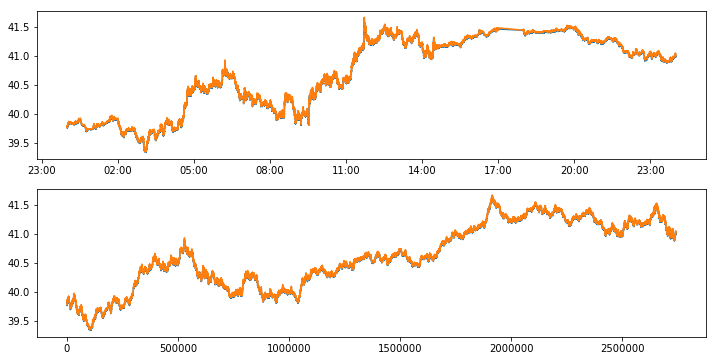

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(211)
ax.plot(df['datetime'], df['bidprice'])
ax.plot(df['datetime'], df['askprice'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax = fig.add_subplot(212)
ax.plot(df.index, df['bidprice']);
ax.plot(df.index, df['askprice']);

In [12]:
df['midprice'] = .5 * (df['bidprice'] + df['askprice'])
df['dmidprice'] = df['midprice'].diff()

In [13]:
df.head(20)

datetime  bidprice  bidsize  askprice  asksize  midprice  \
0  2016-04-18 00:00:00.159     39.79        7      39.8        3    39.795   
1  2016-04-18 00:00:00.739     39.79        6      39.8        3    39.795   
2  2016-04-18 00:00:01.354     39.79        5      39.8        3    39.795   
3  2016-04-18 00:00:01.354     39.79        5      39.8        4    39.795   
4  2016-04-18 00:00:01.354     39.79        4      39.8        4    39.795   
5  2016-04-18 00:00:01.354     39.79        3      39.8        4    39.795   
6  2016-04-18 00:00:01.354     39.79        3      39.8        5    39.795   
7  2016-04-18 00:00:01.661     39.79        1      39.8        5    39.795   
8  2016-04-18 00:00:01.661     39.78       20      39.8        5    39.790   
9  2016-04-18 00:00:01.661     39.78       20      39.8        6    39.790   
10 2016-04-18 00:00:01.661     39.78       20      39.8        7    39.790   
11 2016-04-18 00:00:01.661     39.78       21      39.8        7    39.790   
12 2016-04-18 00:00:01.661     39.78       22      39.8        7    39.790   
13 2016-04-18 00:00:01.661     39.78       22      39.8        8    39.790   
14 2016-04-18 00:00:01.661     39.78       22      39.8        9    39.790   
15 2016-04-18 00:00:01.661     39.78       22      39.8        8    39.790   
16 2016-04-18 00:00:01.664     39.79        1      39.8        8    39.795   
17 2016-04-18 00:00:01.664     39.79        1      39.8        7    39.795   
18 2016-04-18 00:00:01.688     39.79        2      39.8        7    39.795   
19 2016-04-18 00:00:01.826     39.79        2      39.8        6    39.795   

    dmidprice  
0         NaN  
1       0.000  
2       0.000  
3       0.000  
4       0.000  
5       0.000  
6       0.000  
7       0.000  
8      -0.005  
9       0.000  
10      0.000  
11      0.000  
12      0.000  
13      0.000  
14      0.000  
15      0.000  
16      0.005  
17      0.000  
18      0.000  
19      0.000

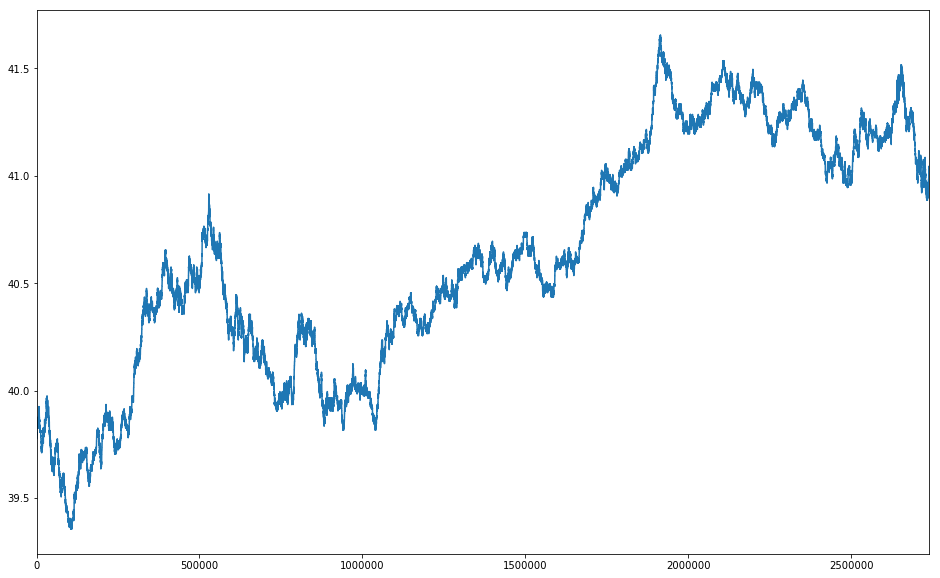

In [14]:
df['midprice'].plot();

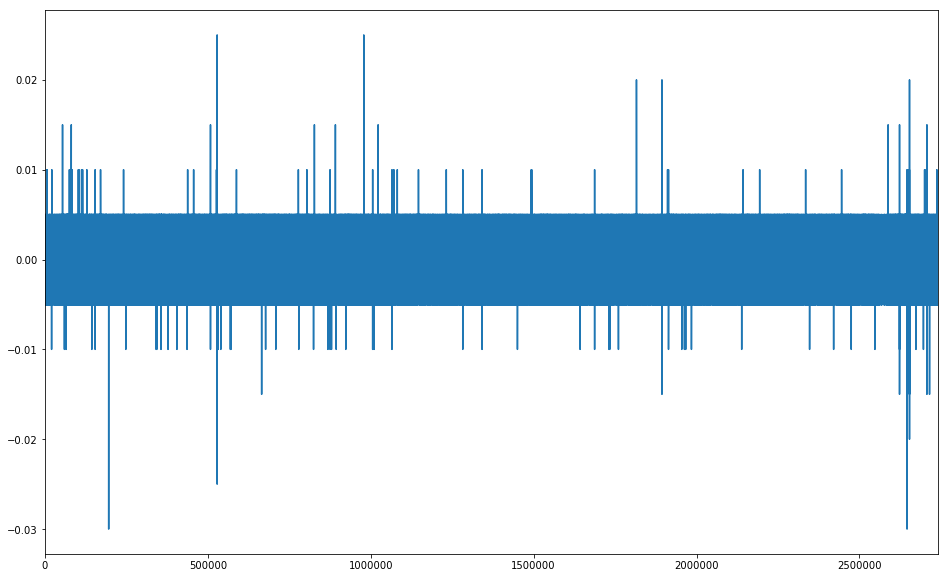

In [15]:
df['dmidprice'].plot();

# Feature Engineering

In this section we define our feature set. Our first regressor is VOI (Shen, 2015)
http://eprints.maths.ox.ac.uk/1895/1/Darryl%20Shen%20%28for%20archive%29.pdf 

In [18]:
dbidsize = df['bidsize'].diff()
dbidprice = df['bidprice'].diff()
cvbid = np.where(dbidprice > 0, df['bidsize'], 0)
cvbid = np.where(dbidprice == 0, dbidsize, cvbid)
cvbid = np.where(dbidprice < 0, 0, cvbid)
dasksize = df['asksize'].diff()
daskprice = df['askprice'].diff()
cvask = np.where(daskprice < 0, df['asksize'], 0)
cvask = np.where(daskprice == 0, dasksize, cvask)
cvask = np.where(daskprice > 0, 0, cvask)
df['voi'] = cvbid - cvask

In [19]:
df.head(20)

datetime  bidprice  bidsize  askprice  asksize  midprice  \
0  2016-04-18 00:00:00.159     39.79        7      39.8        3    39.795   
1  2016-04-18 00:00:00.739     39.79        6      39.8        3    39.795   
2  2016-04-18 00:00:01.354     39.79        5      39.8        3    39.795   
3  2016-04-18 00:00:01.354     39.79        5      39.8        4    39.795   
4  2016-04-18 00:00:01.354     39.79        4      39.8        4    39.795   
5  2016-04-18 00:00:01.354     39.79        3      39.8        4    39.795   
6  2016-04-18 00:00:01.354     39.79        3      39.8        5    39.795   
7  2016-04-18 00:00:01.661     39.79        1      39.8        5    39.795   
8  2016-04-18 00:00:01.661     39.78       20      39.8        5    39.790   
9  2016-04-18 00:00:01.661     39.78       20      39.8        6    39.790   
10 2016-04-18 00:00:01.661     39.78       20      39.8        7    39.790   
11 2016-04-18 00:00:01.661     39.78       21      39.8        7    39.790   
12 2016-04-18 00:00:01.661     39.78       22      39.8        7    39.790   
13 2016-04-18 00:00:01.661     39.78       22      39.8        8    39.790   
14 2016-04-18 00:00:01.661     39.78       22      39.8        9    39.790   
15 2016-04-18 00:00:01.661     39.78       22      39.8        8    39.790   
16 2016-04-18 00:00:01.664     39.79        1      39.8        8    39.795   
17 2016-04-18 00:00:01.664     39.79        1      39.8        7    39.795   
18 2016-04-18 00:00:01.688     39.79        2      39.8        7    39.795   
19 2016-04-18 00:00:01.826     39.79        2      39.8        6    39.795   

    dmidprice  voi  
0         NaN  0.0  
1       0.000 -1.0  
2       0.000 -1.0  
3       0.000 -1.0  
4       0.000 -1.0  
5       0.000 -1.0  
6       0.000 -1.0  
7       0.000 -2.0  
8      -0.005  0.0  
9       0.000 -1.0  
10      0.000 -1.0  
11      0.000  1.0  
12      0.000  1.0  
13      0.000 -1.0  
14      0.000 -1.0  
15      0.000  1.0  
16      0.005  1.0  
17      0.000  1.0  
18      0.000  1.0  
19      0.000  1.0

In [20]:
df.head(20)

datetime  bidprice  bidsize  askprice  asksize  midprice  \
0  2016-04-18 00:00:00.159     39.79        7      39.8        3    39.795   
1  2016-04-18 00:00:00.739     39.79        6      39.8        3    39.795   
2  2016-04-18 00:00:01.354     39.79        5      39.8        3    39.795   
3  2016-04-18 00:00:01.354     39.79        5      39.8        4    39.795   
4  2016-04-18 00:00:01.354     39.79        4      39.8        4    39.795   
5  2016-04-18 00:00:01.354     39.79        3      39.8        4    39.795   
6  2016-04-18 00:00:01.354     39.79        3      39.8        5    39.795   
7  2016-04-18 00:00:01.661     39.79        1      39.8        5    39.795   
8  2016-04-18 00:00:01.661     39.78       20      39.8        5    39.790   
9  2016-04-18 00:00:01.661     39.78       20      39.8        6    39.790   
10 2016-04-18 00:00:01.661     39.78       20      39.8        7    39.790   
11 2016-04-18 00:00:01.661     39.78       21      39.8        7    39.790   
12 2016-04-18 00:00:01.661     39.78       22      39.8        7    39.790   
13 2016-04-18 00:00:01.661     39.78       22      39.8        8    39.790   
14 2016-04-18 00:00:01.661     39.78       22      39.8        9    39.790   
15 2016-04-18 00:00:01.661     39.78       22      39.8        8    39.790   
16 2016-04-18 00:00:01.664     39.79        1      39.8        8    39.795   
17 2016-04-18 00:00:01.664     39.79        1      39.8        7    39.795   
18 2016-04-18 00:00:01.688     39.79        2      39.8        7    39.795   
19 2016-04-18 00:00:01.826     39.79        2      39.8        6    39.795   

    dmidprice  voi  
0         NaN  0.0  
1       0.000 -1.0  
2       0.000 -1.0  
3       0.000 -1.0  
4       0.000 -1.0  
5       0.000 -1.0  
6       0.000 -1.0  
7       0.000 -2.0  
8      -0.005  0.0  
9       0.000 -1.0  
10      0.000 -1.0  
11      0.000  1.0  
12      0.000  1.0  
13      0.000 -1.0  
14      0.000 -1.0  
15      0.000  1.0  
16      0.005  1.0  
17      0.000  1.0  
18      0.000  1.0  
19      0.000  1.0

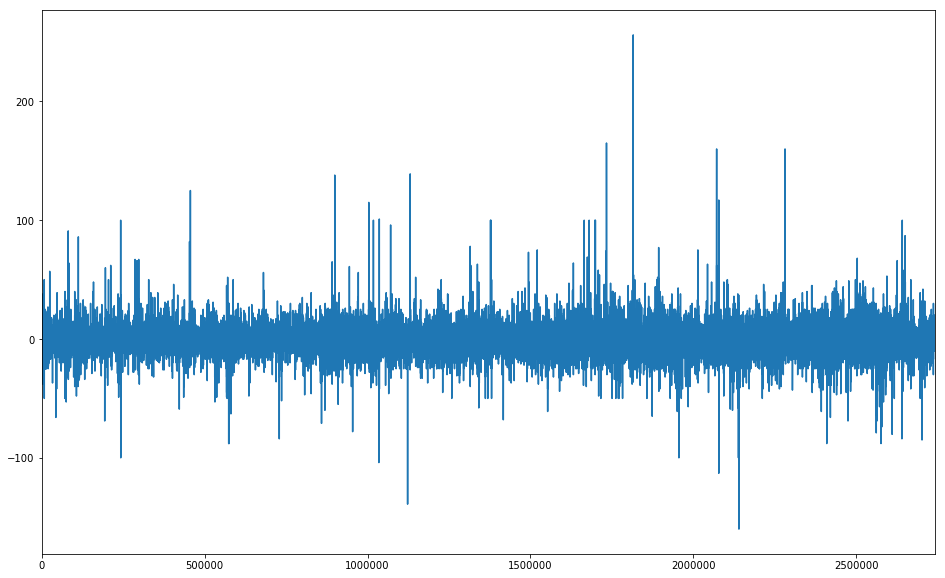

In [21]:
df['voi'].plot();

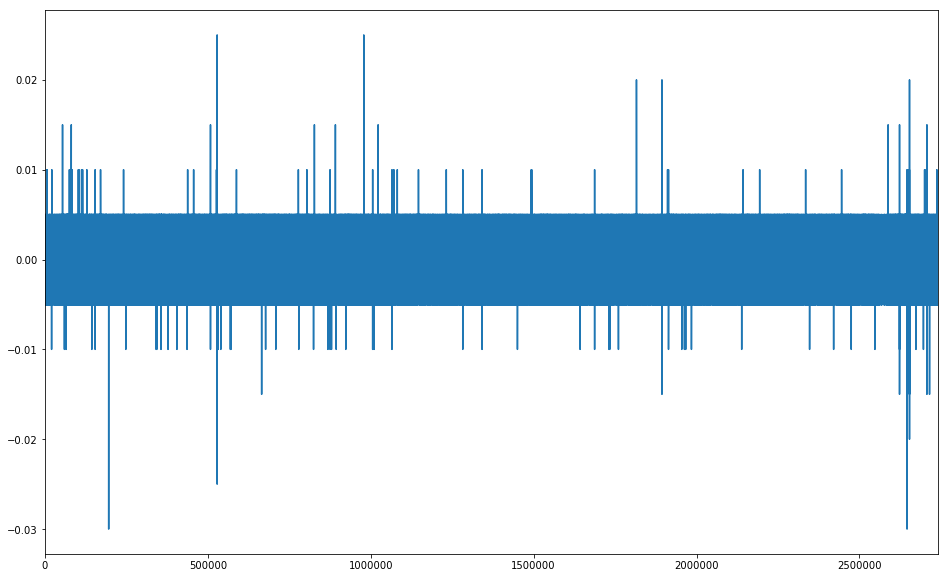

In [22]:
df['dmidprice'].plot();

In [23]:
import statsmodels.api as sm
df.dropna(inplace = True)
model = sm.OLS(df['dmidprice'], df['voi']).fit()
model.summary()

C:\Programs\Win64\Anaconda\V4.4.0_3.6\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dmidprice   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                 4.134e+04
Date:                Tue, 14 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:09:29   Log-Likelihood:             1.4844e+07
No. Observations:             2740313   AIC:                        -2.969e+07
Df Residuals:                 2740312   BIC:                        -2.969e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
voi         6.466e-05   3.18e-07    203.319      0.000     6.4e-05    6.53e-05
==============================================================================
Omnibus:                   654181.996   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         42315103.946
Skew:                           0.004   Prob(JB):                         0.00
Kurtosis:                      22.251   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

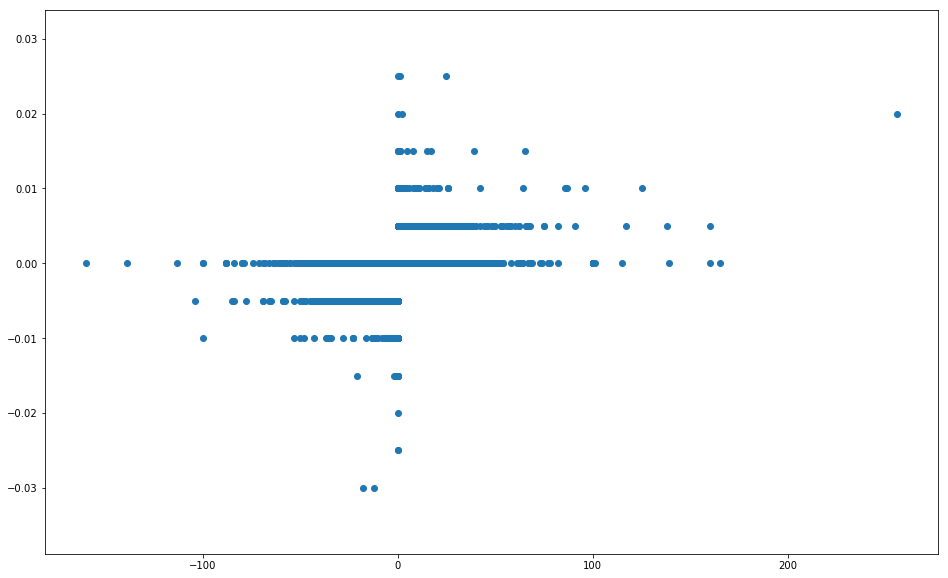

In [24]:
plt.scatter(df.voi, df.dmidprice);

In [25]:
df = df[df['dmidprice'] != 0]
len(df)

127715

In [26]:
model = sm.OLS(df['dmidprice'], df['voi']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dmidprice   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                 2.032e+04
Date:                Tue, 14 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:09:57   Log-Likelihood:             5.0451e+05
No. Observations:              127715   AIC:                        -1.009e+06
Df Residuals:                  127714   BIC:                        -1.009e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
voi            0.0006   4.19e-06    142.543      0.000       0.001       0.001
==============================================================================
Omnibus:                    19934.966   Durbin-Watson:                   2.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264593.216
Skew:                          -0.322   Prob(JB):                         0.00
Kurtosis:                      10.022   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

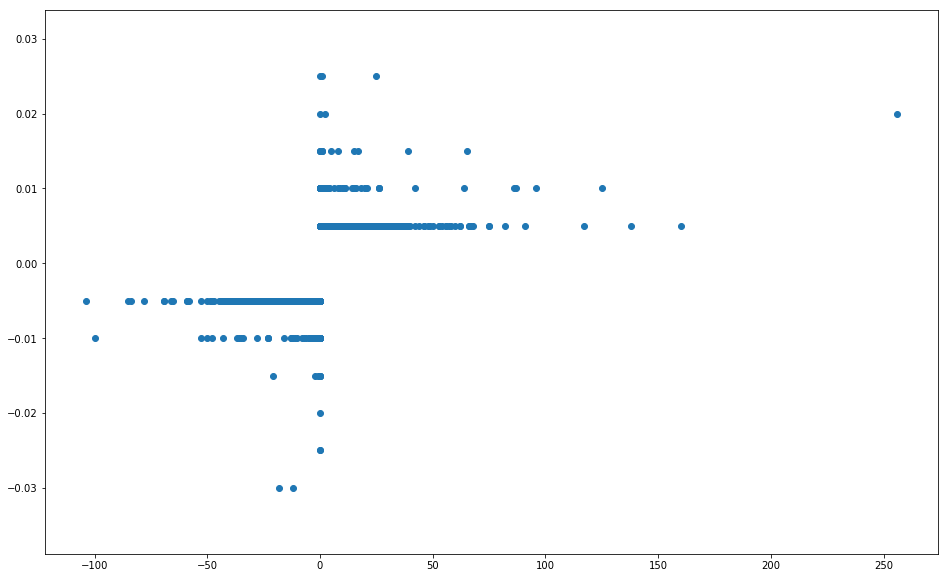

In [27]:
plt.scatter(df.voi, df.dmidprice);

Second feature will be simple order book imbalance, whereby: $I = V_b - V_a $

In [28]:
df['I'] = df['bidsize'] - df['asksize']

In [29]:
df.head()

datetime  bidprice  bidsize  askprice  asksize  midprice  \
8  2016-04-18 00:00:01.661     39.78       20     39.80        5    39.790   
16 2016-04-18 00:00:01.664     39.79        1     39.80        8    39.795   
40 2016-04-18 00:00:02.801     39.78       19     39.80       18    39.790   
47 2016-04-18 00:00:02.801     39.78       14     39.79        1    39.785   
49 2016-04-18 00:00:02.805     39.78       12     39.80       20    39.790   

    dmidprice  voi   I  
8      -0.005  0.0  15  
16      0.005  1.0  -7  
40     -0.005  0.0   1  
47     -0.005 -1.0  13  
49      0.005  0.0  -8

In [30]:
model = sm.OLS(df['dmidprice'], df['I']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dmidprice   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                 8.819e+04
Date:                Tue, 14 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:10:12   Log-Likelihood:             5.2861e+05
No. Observations:              127715   AIC:                        -1.057e+06
Df Residuals:                  127714   BIC:                        -1.057e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I          -9.338e-05   3.14e-07   -296.972      0.000    -9.4e-05   -9.28e-05
==============================================================================
Omnibus:                      108.479   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.791
Skew:                          -0.058   Prob(JB):                     5.31e-25
Kurtosis:                       3.088   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model = sm.OLS(df['dmidprice'], df[['I', 'voi']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dmidprice   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                 5.172e+04
Date:                Tue, 14 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:10:15   Log-Likelihood:             5.3297e+05
No. Observations:              127715   AIC:                        -1.066e+06
Df Residuals:                  127713   BIC:                        -1.066e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I          -8.485e-05   3.17e-07   -267.787      0.000   -8.55e-05   -8.42e-05
voi            0.0003    3.5e-06     94.963      0.000       0.000       0.000
==============================================================================
Omnibus:                      467.736   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.134
Skew:                          -0.123   Prob(JB):                    6.78e-109
Kurtosis:                       3.183   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

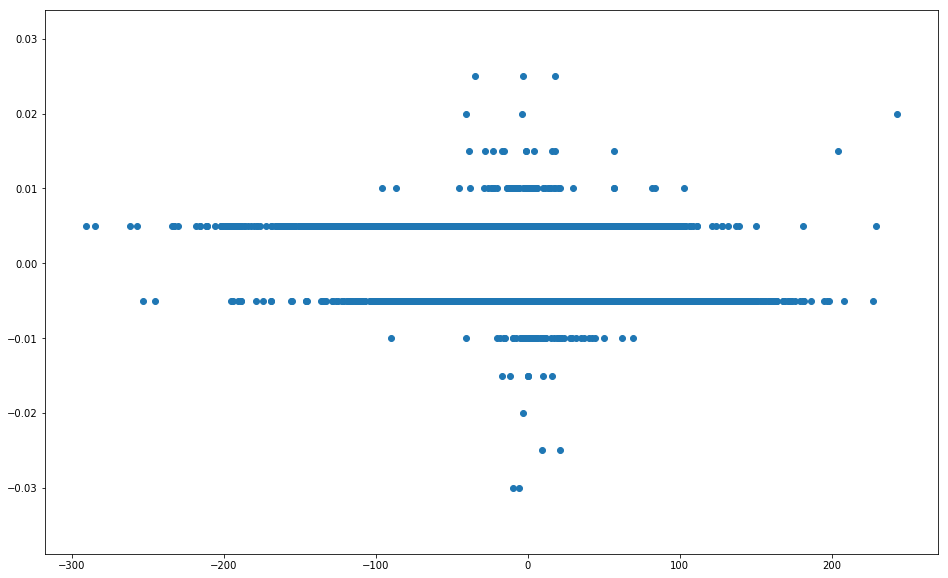

In [32]:
plt.scatter(df['I'], df['dmidprice'])